In [1]:
import pandas as pd
import numpy as np 

In [2]:
measurables = pd.read_csv("data/Measurables.csv")
production = pd.read_csv("data/Production.csv")

final_production = production.copy(deep=True)

In [3]:
pd.set_option('display.max_columns', None)

<Axes: >

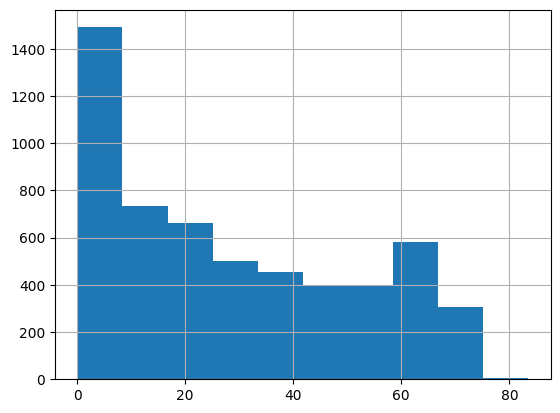

In [4]:
((production.Plays/production.GamesPlayed)).hist()

In [42]:
trimmed_production = production.groupby("PlayerId", group_keys=False).apply(lambda g : g.sort_values("Season").head(4))

In [43]:
trimmed_production.groupby("PlayerId").sum()

,Season,GamesPlayed,GamesStarted,Plays,PositivePlays,NegativePlays
PlayerId,,,,,,
10018,6048,40,2,1141,94,53
10034,2015,1,0,29,2,0
10081,8066,52,48,1905,279,117
10085,8054,21,7,642,80,46
10100,8057,18,0,303,25,7
...,...,...,...,...,...,...
99856,6047,17,3,538,17,8
99900,8066,51,30,1972,257,74
99916,8058,48,30,1647,114,103


In [44]:
final_production = pd.DataFrame(index=trimmed_production.PlayerId.unique())

In [46]:
final_production['num_seasons'] = trimmed_production.groupby("PlayerId").Season.count()
final_production = pd.merge(final_production, trimmed_production.groupby("PlayerId").sum().drop("Season", axis=1), left_index=True, right_index=True)

In [51]:
final_production['GP%'] = final_production['GamesPlayed']/(final_production['num_seasons']*16)
final_production['GS%'] = final_production['GamesStarted']/(final_production['num_seasons']*16)
final_production['PosPlay%'] = final_production['PositivePlays']/final_production['Plays']
final_production['NegPlay%'] = final_production['NegativePlays']/final_production['Plays']
final_production['NeutPlay%'] = (final_production['Plays'] - final_production['PositivePlays'] - final_production['NegativePlays'])/final_production['Plays']

In [53]:
alpha_1 = 0.7
alpha_2 = 0.3
beta_1 = 1
beta_2 = 0.1
beta_3 = -1
w1=0.3
w2=0.7

final_production['score'] = w1*(alpha_1*final_production['GP%'] + alpha_2*final_production['GS%']) + \
                            w2*(beta_1*final_production['PosPlay%'] + beta_2*final_production['NeutPlay%'] + beta_3*final_production['NegPlay%'])

<Axes: >

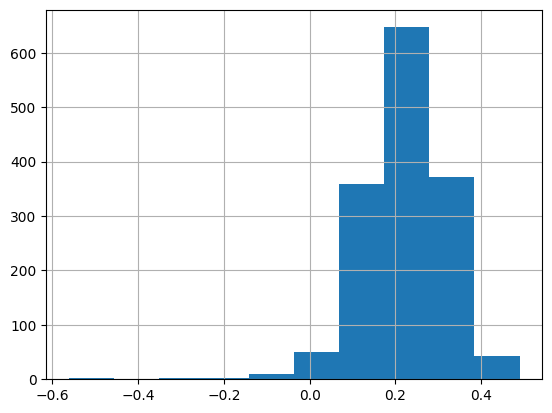

In [58]:
(final_production.score).hist()

In [ ]:
# GP_Metric : alpha_1*GP% + alpha_2*GS% + alpha_3*Plays/G
# Success_Metric : beta_1*PosP% + beta_2*NegP% + beta_3*NeuP%

<Axes: >

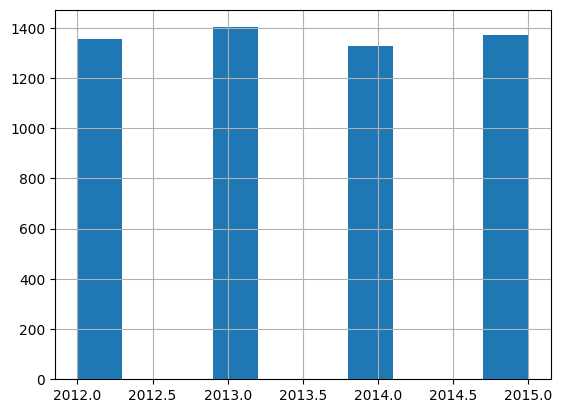

In [59]:
measurables.DraftSeason.hist()

<Axes: >

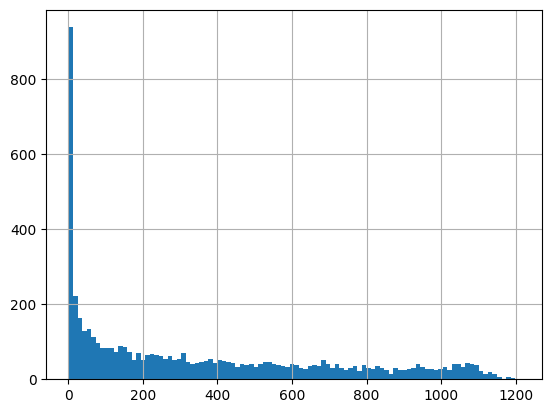

In [25]:
production.Plays.hist(bins=100)

In [ ]:
# Want: 

In [7]:
production['NeutralPlays'] = production.Plays - (production.PositivePlays + production.NegativePlays)
production['PositivePlayPercent'] = (production.PositivePlays / production.Plays).round(4)
production['score'] = ((production.PositivePlays - production.NegativePlays)/production.Plays).round(4)


In [ ]:
filtered_production = production.query("Plays > 10")

In [8]:
filtered_production.PositivePlayPercent.describe()

count    4670.000000
mean        0.071355
std         0.050422
min         0.000000
25%         0.035825
50%         0.058250
75%         0.096000
max         0.416700
Name: PositivePlayPercent, dtype: float64

<Axes: >

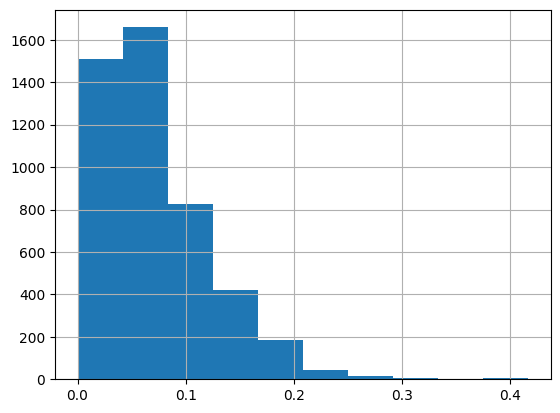

In [9]:
filtered_production.PositivePlayPercent.hist()

In [10]:
filtered_production.shape

(4670, 10)

In [11]:
filtered_production.query("PositivePlayPercent > 0.3")

,PlayerId,Season,GamesPlayed,GamesStarted,Plays,PositivePlays,NegativePlays,NeutralPlays,PositivePlayPercent,score
181,72303,2016,1,0,12,5,0,7,0.4167,0.4167
611,39078,2016,1,0,28,11,1,16,0.3929,0.3571
692,37060,2017,16,0,54,20,0,34,0.3704,0.3704
1007,97361,2013,9,0,53,16,2,35,0.3019,0.2642
1115,78667,2017,4,0,14,5,0,9,0.3571,0.3571
1474,49905,2013,4,0,26,10,1,15,0.3846,0.3462
1822,47942,2016,2,0,13,5,0,8,0.3846,0.3846
2125,21191,2017,9,2,173,55,2,116,0.3179,0.3064
2361,39436,2015,11,1,78,24,4,50,0.3077,0.2564


In [21]:
filtered_production.groupby("PlayerId").Plays.sum()

PlayerId
10018    1141
10034      29
10081    1905
10085    2329
10100     295
         ... 
99856     538
99900    1972
99916    2494
99968      67
99991    1278
Name: Plays, Length: 1349, dtype: int64

In [17]:
filtered_production.query("PlayerId == 10018 or PlayerId == 10034")

,PlayerId,Season,GamesPlayed,GamesStarted,Plays,PositivePlays,NegativePlays,NeutralPlays,PositivePlayPercent,score
1084,10034,2015,1,0,29,2,0,27,0.0690,0.0690
2644,10018,2015,14,0,367,22,24,321,0.0599,-0.0054
2646,10018,2017,13,0,310,40,16,254,0.1290,0.0774
4743,10018,2016,13,2,464,32,13,419,0.0690,0.0409


In [12]:
filtered_production.groupby("PlayerId").sum()

,Season,GamesPlayed,GamesStarted,Plays,PositivePlays,NegativePlays,NeutralPlays,PositivePlayPercent,score
PlayerId,,,,,,,,,
10018,6048,40,2,1141,94,53,994,0.2579,0.1129
10034,2015,1,0,29,2,0,27,0.0690,0.0690
10081,8066,52,48,1905,279,117,1509,0.6044,0.3442
10085,14105,49,30,2329,261,204,1864,0.6150,0.1690
10100,6041,15,0,295,25,7,263,0.3921,0.2880
...,...,...,...,...,...,...,...,...,...
99856,6047,17,3,538,17,8,513,0.0683,0.0064
99900,8066,51,30,1972,257,74,1641,0.5308,0.3710
99916,12093,73,51,2494,197,146,2151,0.4981,0.1471


In [7]:
all_ids = pd.merge(production, measurables, how='left', on='PlayerId')

In [8]:
all_ids#.dropna(subset=['Season'])

,PlayerId,Season,GamesPlayed,GamesStarted,Plays,PositivePlays,NegativePlays,DraftSeason,CollegePosition,ProPosition,FirstName,LastName,Hgt,Wgt,Age,Forty,Arm,Hand,Wing,Test,TestAttempt,TenYard,TwentyYard,ThreeCone,VJ,BJ,TwentyShuttle,SixtyShuttle,BP,BodyFat,LeanMass,IndyInvite
0,28548,2016,6,4,252,29,30,2015,QB,QB,JACOB,TROTTER,74.88,230,23.9,4.85,31.875,10.000,77.375,31.0,42.0,1.64,2.72,6.91,34.0,10.01,4.13,NaN,NaN,11.5,203.970,Y
1,67779,2016,2,2,136,3,12,2013,OG,OG,RONTEZ,DAVIS,74.00,317,21.6,5.47,34.750,9.875,81.125,21.0,30.0,1.94,3.15,7.93,24.5,9.02,5.01,NaN,NaN,21.4,249.074,Y
2,31572,2016,1,0,11,1,0,2015,WR,WR,DAWSON,JOHNSON,69.25,173,NaN,4.27,29.375,8.125,69.750,25.0,30.0,1.51,2.54,6.59,42.0,10.11,4.09,11.03,13.0,NaN,NaN,N
3,31572,2018,8,0,46,1,0,2015,WR,WR,DAWSON,JOHNSON,69.25,173,NaN,4.27,29.375,8.125,69.750,25.0,30.0,1.51,2.54,6.59,42.0,10.11,4.09,11.03,13.0,NaN,NaN,N
4,87360,2016,16,7,554,27,33,2014,OG,OG,KYSHOEN,NIX,76.63,316,23.6,5.17,33.250,10.375,81.000,25.0,50.0,1.88,2.98,7.49,26.5,9.00,4.47,NaN,26.0,24.4,238.997,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5523,50813,2014,6,1,169,14,15,2013,DT,DT,LOUIS,ORR,73.13,336,NaN,5.09,31.625,9.875,76.500,12.0,23.0,1.75,2.95,8.54,24.0,7.10,5.01,NaN,26.0,NaN,NaN,N
5524,90160,2017,15,3,432,43,14,2014,DT,DT,ADRIAN,EFAW,74.50,329,22.5,NaN,32.125,10.125,78.500,25.0,33.0,1.69,2.89,7.27,31.0,8.08,4.50,NaN,30.0,NaN,NaN,N
5525,19139,2016,16,16,1052,57,89,2014,OLB,OLB,ISAME,GREEN,76.88,255,22.1,4.60,33.500,9.375,80.750,24.0,34.0,1.65,2.68,6.82,34.5,9.11,4.19,11.71,15.0,12.2,224.899,Y
5526,88191,2017,7,6,276,24,31,2015,ILB,ILB,DARNELL,WALLACE,70.75,236,22.4,4.69,31.875,9.500,74.625,17.0,29.0,1.66,2.72,NaN,32.0,9.05,NaN,NaN,27.0,16.1,197.791,Y


In [9]:
measurables

,PlayerId,DraftSeason,CollegePosition,ProPosition,FirstName,LastName,Hgt,Wgt,Age,Forty,Arm,Hand,Wing,Test,TestAttempt,TenYard,TwentyYard,ThreeCone,VJ,BJ,TwentyShuttle,SixtyShuttle,BP,BodyFat,LeanMass,IndyInvite
0,48418,2013,DC,DC,MARK,FOLKERTS,72.25,191,23.7,4.63,31.750,8.875,74.750,13.0,26.0,1.64,2.68,7.15,NaN,NaN,4.52,12.10,2.0,NaN,NaN,N
1,56191,2012,WR,WR,JOSHUA,HARLEY,75.13,219,22.2,4.50,34.125,10.125,81.625,21.0,50.0,1.57,2.57,6.95,36.5,10.05,4.14,11.28,19.0,6.4,202.883,Y
2,70345,2012,DS,DS,GERALD,BLACK,70.50,209,23.1,4.74,31.625,9.250,73.000,23.0,40.0,1.68,2.72,7.18,36.0,10.01,4.50,NaN,21.0,NaN,NaN,N
3,18539,2012,DS,DS,PATRICK,BRIDGES,73.63,208,24.0,4.67,31.500,9.375,75.000,17.0,49.0,1.71,2.74,7.20,33.5,10.03,4.41,12.20,11.0,NaN,NaN,N
4,16287,2013,RB,RB,NIHJA,SINGLETARY,71.00,230,22.9,4.60,31.000,9.500,73.500,17.0,35.0,1.67,2.66,7.33,33.5,9.07,4.54,11.77,NaN,14.0,198.952,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5447,36680,2012,OG,OG,JOHN,HARRIS,73.63,316,21.5,5.30,31.875,9.750,77.500,NaN,NaN,1.83,3.03,7.83,27.0,7.09,4.74,NaN,25.0,NaN,NaN,N
5448,59855,2013,WR,WR,JORDAN,LANARIS,74.00,203,23.2,4.54,33.250,9.000,79.250,20.0,29.0,1.70,2.74,7.31,33.0,9.05,4.54,11.80,16.0,NaN,NaN,N
5449,35356,2013,DT,DT,VAUGHN,GARCIA,74.75,287,23.2,5.17,32.250,10.125,77.750,22.0,28.0,1.69,2.97,7.52,27.5,8.05,4.65,NaN,32.0,NaN,NaN,N
5450,64908,2014,WR,WR,COREY,UNDERWOOD,73.13,212,22.7,4.56,32.250,9.250,78.500,17.0,23.0,1.62,2.70,7.33,NaN,9.01,4.56,12.30,12.0,NaN,NaN,N


In [38]:
measurables.CollegePosition.value_counts()

CollegePosition
WR     752
DC     512
DE     489
OT     482
DS     443
DT     426
RB     414
OLB    353
TE     308
OG     307
ILB    254
QB     237
OC     147
PT     106
PK     102
FB      68
LS      44
NT       5
RS       2
ST       1
Name: count, dtype: int64

<Axes: >

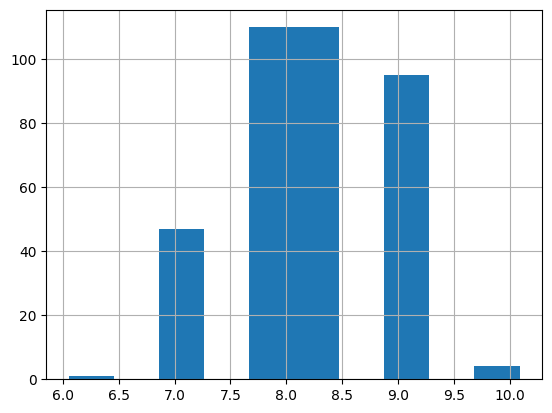

In [20]:
measurables.query("CollegePosition == 'DT'").BJ.hist()

<Axes: >

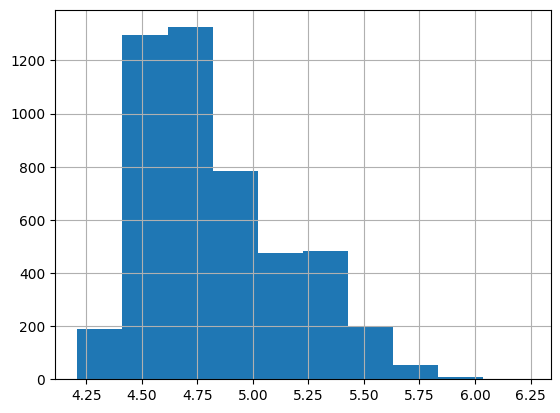

In [13]:
measurables.Forty.hist()